# Covid_19

## Summary

The unexpected COVID-19 pandemic emergence in the beginning of 2020 has affected whole the world. Decision-makers in governments, Companies and all other parts that are affected, are looking for solutions to deal with this pandemic. Machine learning techniques can help to find solutions for many problems caused by Covid_19. Forecasting spread of disease in the state using machine learning is one of the essential information which helps to control the pandemic. Planning for future trajectories, observing the effective variables such as location, climates, social habits and etc., are examples of importance and applications of forecasting the spread of disease. These kinds of problems classified under time series category. Here, in this time series I used ARIMA model and ANN model to forecast accurately the number of deaths due to this disease in the US. 

## Introduction

Although appearance of COVID-19 was extremely unexpected, but given the importance of the issue and its global nature, a lot of research is being done in this short period of time. Navid Ghaffarzadegan et al. tried to estimate the spread of COVID-19 in Iran using a simulation-based estimation [1]. Tania Dehesh el al. forecasted of COVID-19 Confirmed Cases in Different Countries with ARIMA Models. They have used the data of regions with high number of confirmed cases, and then, they identified the best fitted ARIMA model for each country. Finally, using best fitted ARIMA model of each region, they predicted confirmed cases in next 17 days [2]. In another paper that was released by Lin Jia et al. using three mathematical models, they simulated the spread of the virus in China. they concluded the Logistic model may be the best fitted model among the three models studied in that paper [3].
In this research, we want to predict the fatalities of US, using ARIMA model and Artificial Neural Network, and then validating our prediction by real data to compare these two approaches. As I have stated before, time series problems are not limited to demographic functions like this, predicting stock prices is one of the popular applications of this problems. Ayodele Ariyo Adebiyi at el. Have used this approach to predict Dell stock index. They concluded the ANN model works better than ARIMA in terms of forecasting error, although both ARIMA’s predicted values are very convergent with original results [4].


## Data Description

The datasets that were released from John Hopkins University, were conducted to prepare input data of our models. As Ghaffarzadegan and Rahmandad mentioned, Official data are not completely reliable because not all patients are identified regarding low number of diagnostic tests, or flu misdiagnosis in first days of pandemic [1]. To minimize this error, we decided to use fatality stats of disease instead of laying on confirmed cases.
I have used US fatalities by adding up the number of deaths in all states. A new dataset was extracted by differentiating of daily cumulative fatalities in Excel. Therefore, our time series consist of a row of 81 values of death in US from that specified period. Following are graphs of US situation from January 23rd to April 12th.  In first graph the cumulative deaths in US from January 23rd to April 12th have showed. Second graph, visualizes the situation of New York, New Jersey, Michigan and Louisiana, the states with worst conditions. Third graph is prepared to show the number of deaths for each day in the specified period. These values are our target, in this problem.


## Data Set and Method

I used the dataset relesed by New York Times. 
Link to the dataset: https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset?select=us-counties.csv

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

dataset = pd.read_csv('us-counties.csv')
dataset.head(20)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
5,2020-01-25,Orange,California,6059.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
7,2020-01-25,Snohomish,Washington,53061.0,1,0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0
9,2020-01-26,Los Angeles,California,6037.0,1,0


### Data preprocessing

In [69]:
States = dataset[['date','state','deaths']]
States.head()

,date,state,deaths
0,2020-01-21,Washington,0
1,2020-01-22,Washington,0
2,2020-01-23,Washington,0
3,2020-01-24,Illinois,0
4,2020-01-24,Washington,0


In [117]:
CA=States[States['state']=='California']
WA=States[States['state']=='Washington']
AR=States[States['state']=='Arizona']
NY=States[States['state']=='New York']
NY.head(10)

,date,state,deaths
416,2020-03-01,New York,0
448,2020-03-02,New York,0
482,2020-03-03,New York,0
518,2020-03-04,New York,0
519,2020-03-04,New York,0
564,2020-03-05,New York,0
565,2020-03-05,New York,0
566,2020-03-05,New York,0
626,2020-03-06,New York,0
627,2020-03-06,New York,0


In [128]:
CA['date'] = pd.to_datetime(CA['date'])
CA_g = CA[['date','deaths']].groupby('date').sum()
CA_g_d =CA_g.diff(periods=1)
CA_g.tail(20)

WA['date'] = pd.to_datetime(WA['date'])
WA_g = WA[['date','deaths']].groupby('date').sum()
WA_g_d=WA_g.diff(periods=1)
WA_g.tail(20)

AR['date'] = pd.to_datetime(AR['date'])
AR_g = AR[['date','deaths']].groupby('date').sum()
AR_g_d= AR_g.diff(periods=1)
AR_g.tail(20)

NY['date'] = pd.to_datetime(NY['date'])
NY_g = NY[['date','deaths']].groupby('date').sum()
NY_g_d=NY_g.diff(periods=1)
NY_g.tail(20)

/Users/minamahdavi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/minamahdavi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/minamahdavi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,deaths
date,
2020-10-27,33092
2020-10-28,33107
2020-10-29,33128
2020-10-30,33143
2020-10-31,33152
2020-11-01,33174
2020-11-02,33187
2020-11-03,33198
2020-11-04,33222


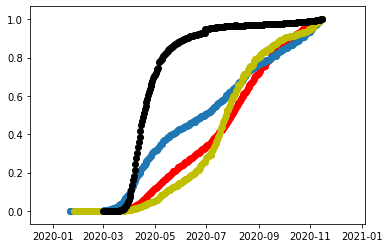

In [129]:

plt.scatter(CA_g.index, CA_g['deaths']/CA_g['deaths'].max(),color='red')
plt.scatter(WA_g.index, WA_g['deaths']/WA_g['deaths'].max())
plt.scatter(AR_g.index, AR_g['deaths']/AR_g['deaths'].max(),color='y')
plt.scatter(NY_g.index, NY_g['deaths']/NY_g['deaths'].max(),color='k')


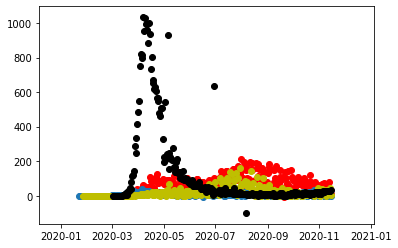

In [136]:

plt.scatter(CA_g.index, CA_g_d['deaths'],color='red')
plt.scatter(WA_g.index, WA_g_d['deaths'])
plt.scatter(AR_g.index, AR_g_d['deaths'],color='y')
plt.scatter(NY_g.index, NY_g_d['deaths'],color='k')

# CA_g.plot()
# WA_g.plot()

### Splitting the dataset into the Training set and Test set

In [150]:
X = CA_g.index.values
y = CA_g.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [151]:
X_train

array(['2020-06-08T00:00:00.000000000', '2020-06-10T00:00:00.000000000',
       '2020-07-19T00:00:00.000000000', '2020-08-30T00:00:00.000000000',
       '2020-02-14T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-06-25T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-07-16T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2020-09-02T00:00:00.000000000', '2020-10-06T00:00:00.000000000',
       '2020-03-02T00:00:00.000000000', '2020-09-07T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-04-23T00:00:00.000000000',
       '2020-11-06T00:00:00.000000000', '2020-06-29T00:00:00.000000000',
       '2020-10-22T00:00:00.000000000', '2020-05-12T00:00:00.000000000',
       '2020-09-28T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-06-12T00:00:00.000000000', '2020-07-09T00:00:00.000000000',
       '2020-05-28T00:00:00.000000000', '2020-05-30T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-09-18

## Analysis

In [152]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['2020-06-08T00:00:00.000000000' '2020-06-10T00:00:00.000000000'
 '2020-07-19T00:00:00.000000000' '2020-08-30T00:00:00.000000000'
 '2020-02-14T00:00:00.000000000' '2020-03-11T00:00:00.000000000'
 '2020-06-25T00:00:00.000000000' '2020-09-03T00:00:00.000000000'
 '2020-07-16T00:00:00.000000000' '2020-02-21T00:00:00.000000000'
 '2020-09-02T00:00:00.000000000' '2020-10-06T00:00:00.000000000'
 '2020-03-02T00:00:00.000000000' '2020-09-07T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-04-23T00:00:00.000000000'
 '2020-11-06T00:00:00.000000000' '2020-06-29T00:00:00.000000000'
 '2020-10-22T00:00:00.000000000' '2020-05-12T00:00:00.000000000'
 '2020-09-28T00:00:00.000000000' '2020-04-10T00:00:00.000000000'
 '2020-06-12T00:00:00.000000000' '2020-07-09T00:00:00.000000000'
 '2020-05-28T00:00:00.000000000' '2020-05-30T00:00:00.000000000'
 '2020-03-09T00:00:00.000000000' '2020-09-18T00:00:00.000000000'
 '2020-11-07T00:00:00.000000000' '2020-05-26T00:00:00.000000000'
 '2020-07-27T00:00:00.000000000' '2020-03-19T00:00:00.000000000'
 '2020-06-07T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-07-04T00:00:00.000000000' '2020-09-27T00:00:00.000000000'
 '2020-06-18T00:00:00.000000000' '2020-08-13T00:00:00.000000000'
 '2020-04-05T00:00:00.000000000' '2020-06-09T00:00:00.000000000'
 '2020-09-20T00:00:00.000000000' '2020-08-12T00:00:00.000000000'
 '2020-11-04T00:00:00.000000000' '2020-08-21T00:00:00.000000000'
 '2020-06-23T00:00:00.000000000' '2020-07-11T00:00:00.000000000'
 '2020-02-27T00:00:00.000000000' '2020-04-17T00:00:00.000000000'
 '2020-08-20T00:00:00.000000000' '2020-03-25T00:00:00.000000000'
 '2020-10-09T00:00:00.000000000' '2020-10-27T00:00:00.000000000'
 '2020-05-14T00:00:00.000000000' '2020-02-15T00:00:00.000000000'
 '2020-02-23T00:00:00.000000000' '2020-09-05T00:00:00.000000000'
 '2020-02-10T00:00:00.000000000' '2020-03-21T00:00:00.000000000'
 '2020-04-09T00:00:00.000000000' '2020-07-10T00:00:00.000000000'
 '2020-06-17T00:00:00.000000000' '2020-06-30T00:00:00.000000000'
 '2020-06-27T00:00:00.000000000' '2020-05-13T00:00:00.000000000'
 '2020-06-02T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-04-30T00:00:00.000000000' '2020-07-30T00:00:00.000000000'
 '2020-03-26T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-09-30T00:00:00.000000000' '2020-11-02T00:00:00.000000000'
 '2020-10-17T00:00:00.000000000' '2020-10-26T00:00:00.000000000'
 '2020-03-05T00:00:00.000000000' '2020-07-24T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-05-11T00:00:00.000000000'
 '2020-08-06T00:00:00.000000000' '2020-01-28T00:00:00.000000000'
 '2020-06-26T00:00:00.000000000' '2020-05-29T00:00:00.000000000'
 '2020-02-18T00:00:00.000000000' '2020-02-24T00:00:00.000000000'
 '2020-04-11T00:00:00.000000000' '2020-10-24T00:00:00.000000000'
 '2020-07-25T00:00:00.000000000' '2020-02-13T00:00:00.000000000'
 '2020-09-29T00:00:00.000000000' '2020-09-06T00:00:00.000000000'
 '2020-10-13T00:00:00.000000000' '2020-04-14T00:00:00.000000000'
 '2020-03-16T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-09-10T00:00:00.000000000' '2020-05-08T00:00:00.000000000'
 '2020-07-18T00:00:00.000000000' '2020-04-20T00:00:00.000000000'
 '2020-02-04T00:00:00.000000000' '2020-07-31T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-06T00:00:00.000000000'
 '2020-02-08T00:00:00.000000000' '2020-06-28T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-08-17T00:00:00.000000000'
 '2020-09-08T00:00:00.000000000' '2020-05-27T00:00:00.000000000'
 '2020-11-10T00:00:00.000000000' '2020-03-27T00:00:00.000000000'
 '2020-10-07T00:00:00.000000000' '2020-09-01T00:00:00.000000000'
 '2020-06-03T00:00:00.000000000' '2020-08-29T00:00:00.000000000'
 '2020-07-22T00:00:00.000000000' '2020-03-08T00:00:00.000000000'
 '2020-05-18T00:00:00.000000000' '2020-06-11T00:00:00.000000000'
 '2020-08-03T00:00:00.000000000' '2020-08-24T00:00:00.000000000'
 '2020-06-22T00:00:00.000000000' '2020-05-16T00:00:00.000000000'
 '2020-09-22T00:00:00.000000000' '2020-05-02T00:00:00.000000000'
 '2020-11-08T00:00:00.000000000' '2020-04-27T00:00:00.000000000'
 '2020-08-11T00:00:00.000000000' '2020-07-05T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-07-21T00:00:00.000000000'
 '2020-05-17T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-04-28T00:00:00.000000000' '2020-04-29T00:00:00.000000000'
 '2020-11-12T00:00:00.000000000' '2020-10-08T00:00:00.000000000'
 '2020-09-15T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-03-14T00:00:00.000000000' '2020-03-13T00:00:00.000000000'
 '2020-04-19T00:00:00.000000000' '2020-11-13T00:00:00.000000000'
 '2020-06-14T00:00:00.000000000' '2020-02-17T00:00:00.000000000'
 '2020-09-21T00:00:00.000000000' '2020-06-21T00:00:00.000000000'
 '2020-06-16T00:00:00.000000000' '2020-04-12T00:00:00.000000000'
 '2020-07-23T00:00:00.000000000' '2020-05-04T00:00:00.000000000'
 '2020-08-16T00:00:00.000000000' '2020-06-04T00:00:00.000000000'
 '2020-10-14T00:00:00.000000000' '2020-11-14T00:00:00.000000000'
 '2020-08-08T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-04-02T00:00:00.000000000' '2020-08-15T00:00:00.000000000'
 '2020-04-18T00:00:00.000000000' '2020-07-13T00:00:00.000000000'
 '2020-05-25T00:00:00.000000000' '2020-06-13T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-10-21T00:00:00.000000000'
 '2020-06-15T00:00:00.000000000' '2020-10-03T00:00:00.000000000'
 '2020-04-25T00:00:00.000000000' '2020-04-16T00:00:00.000000000'
 '2020-10-30T00:00:00.000000000' '2020-02-05T00:00:00.000000000'
 '2020-05-23T00:00:00.000000000' '2020-05-06T00:00:00.000000000'
 '2020-02-29T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-07-12T00:00:00.000000000' '2020-09-12T00:00:00.000000000'
 '2020-03-30T00:00:00.000000000' '2020-01-26T00:00:00.000000000'
 '2020-05-24T00:00:00.000000000' '2020-10-12T00:00:00.000000000'
 '2020-07-29T00:00:00.000000000' '2020-03-07T00:00:00.000000000'
 '2020-05-09T00:00:00.000000000' '2020-06-05T00:00:00.000000000'
 '2020-04-13T00:00:00.000000000' '2020-02-11T00:00:00.000000000'
 '2020-10-10T00:00:00.000000000' '2020-09-13T00:00:00.000000000'
 '2020-03-03T00:00:00.000000000' '2020-06-06T00:00:00.000000000'
 '2020-03-18T00:00:00.000000000' '2020-07-07T00:00:00.000000000'
 '2020-10-04T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-02-28T00:00:00.000000000' '2020-02-22T00:00:00.000000000'
 '2020-07-26T00:00:00.000000000' '2020-07-06T00:00:00.000000000'
 '2020-06-24T00:00:00.000000000' '2020-09-25T00:00:00.000000000'
 '2020-08-14T00:00:00.000000000' '2020-02-25T00:00:00.000000000'
 '2020-02-26T00:00:00.000000000' '2020-05-31T00:00:00.000000000'
 '2020-07-28T00:00:00.000000000' '2020-10-25T00:00:00.000000000'
 '2020-10-18T00:00:00.000000000' '2020-06-20T00:00:00.000000000'
 '2020-10-23T00:00:00.000000000' '2020-07-20T00:00:00.000000000'
 '2020-05-03T00:00:00.000000000' '2020-08-09T00:00:00.000000000'
 '2020-09-24T00:00:00.000000000' '2020-05-19T00:00:00.000000000'
 '2020-10-16T00:00:00.000000000' '2020-04-06T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-07-08T00:00:00.000000000'
 '2020-11-03T00:00:00.000000000' '2020-07-17T00:00:00.000000000'
 '2020-11-05T00:00:00.000000000' '2020-03-04T00:00:00.000000000'
 '2020-08-05T00:00:00.000000000' '2020-04-22T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-21T00:00:00.000000000'
 '2020-09-23T00:00:00.000000000' '2020-10-28T00:00:00.000000000'
 '2020-08-23T00:00:00.000000000' '2020-02-03T00:00:00.000000000'
 '2020-08-07T00:00:00.000000000' '2020-10-02T00:00:00.000000000'
 '2020-08-04T00:00:00.000000000' '2020-05-21T00:00:00.000000000'
 '2020-03-12T00:00:00.000000000' '2020-07-15T00:00:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [153]:
y_pred = regressor.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.